In [1]:
#Import Turing and Distributions
using Turing, Distributions, LinearAlgebra

# Import MCMCChain, Plots, and StatsPlots for visualizations and diagnostics.
using MCMCChains, Plots, StatsPlots, GraphPlot, GraphRecipes, PyCall

# Set a seed for reproducibility.
using Random
Random.seed!(12);

# Turn off progress monitor.
Turing.turnprogress(false)

┌ Info: Recompiling stale cache file /home/saumya/.julia/compiled/v1.1/Turing/gm4QC.ji for Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/saumya/.julia/compiled/v1.1/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1184
┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /home/saumya/.julia/packages/Turing/RZOZ8/src/Turing.jl:24


false

In [2]:
# graph = SimpleGraph(20, 45)
# nv(graph)

In [44]:
# Set hyperparameters
K = 3
alpha = 0.1 * ones(K)
eta = Symmetric(rand(5,5))
eta[diagind(eta)] .= 1
eta

5×5 Symmetric{Float64,Array{Float64,2}}:
 1.0       0.281166  0.916021  0.2183    0.568523
 0.281166  1.0       0.159698  0.292547  0.688067
 0.916021  0.159698  1.0       0.985125  0.341369
 0.2183    0.292547  0.985125  1.0       0.643634
 0.568523  0.688067  0.341369  0.643634  1.0     

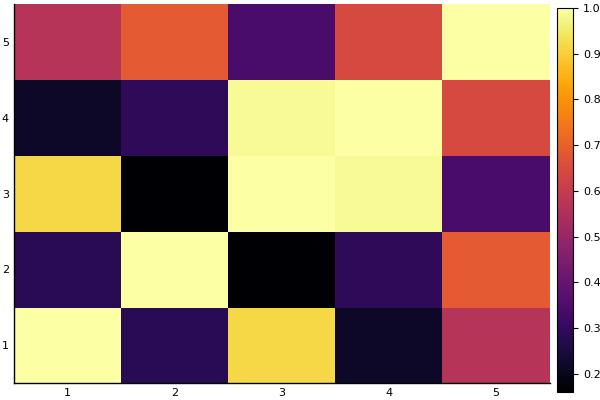

In [45]:
# Generate data
N = 7
clusters = rand(1:K, N)
graph = zeros(N,N)
for i=1:N
    graph[i, i] = 1
    for j = 1:i-1
        cluster_i = clusters[i]
        cluster_j = clusters[j]
        eta_ij = eta[cluster_i, cluster_j]
        if(eta_ij > rand())
            graph[i, j] = 1
            graph[j, i] = 1
        end
    end
end
pyplot()
heatmap(graph)
heatmap(eta)

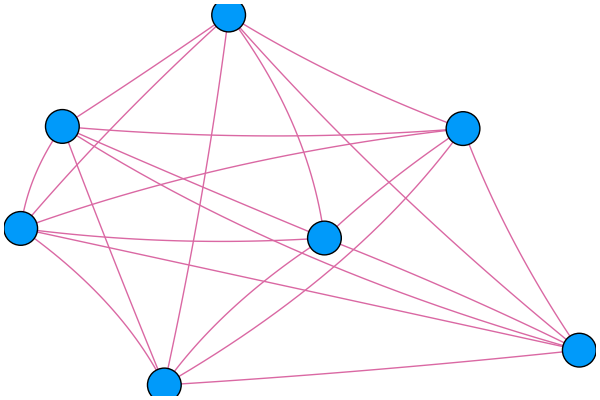

In [46]:
graphplot(graph)

In [47]:
@model mmsb(alpha, eta, graph, N) = begin
    pi = Vector{Vector}(undef, N)
    for n=1:N
        pi[n] ~ Dirichlet(alpha)
    end
    
    for n=1:N
        for m=1:n-1
            z_nm ~ Categorical(pi[n])
            z_mn ~ Categorical(pi[m])
            graph[n, m] ~ Bernoulli(eta[z_nm, z_mn])
        end
    end
end;

In [49]:
# This is temporary while the reverse differentiation backend is being improved.
Turing.setadbackend(:forward_diff)

# Sample using NUTS.
num_chains = 4
# chains = mapreduce(c -> sample(poisson_regression(data, data_labels, n, 10), NUTS(2500, 200, 0.65) ), chainscat, 1:num_chains);
chain = sample(mmsb(alpha, eta, graph, N), NUTS(2500, 0.05, 10) )

ArgumentError: ArgumentError: invalid index: Dual{ForwardDiff.Tag{getfield(Turing.Core, Symbol("#f#26")){Turing.Core.RandomVariables.UntypedVarInfo,Turing.Model{Tuple{:pi,:z_nm,:z_mn},Tuple{:graph},getfield(Main, Symbol("###inner_function#545#45")){Array{Float64,1},Symmetric{Float64,Array{Float64,2}},Int64},NamedTuple{(:graph,),Tuple{Array{Float64,2}}},NamedTuple{(:graph,),Tuple{Symbol}}},Turing.Sampler{SGLD{Turing.Core.ForwardDiffAD{40},Any}}},Real}}(1,0,0,0,0,0,0,0,0,0,0,0,0) of type ForwardDiff.Dual{ForwardDiff.Tag{getfield(Turing.Core, Symbol("#f#26")){Turing.Core.RandomVariables.UntypedVarInfo,Turing.Model{Tuple{:pi,:z_nm,:z_mn},Tuple{:graph},getfield(Main, Symbol("###inner_function#545#45")){Array{Float64,1},Symmetric{Float64,Array{Float64,2}},Int64},NamedTuple{(:graph,),Tuple{Array{Float64,2}}},NamedTuple{(:graph,),Tuple{Symbol}}},Turing.Sampler{SGLD{Turing.Core.ForwardDiffAD{40},Any}}},Real},Real,12}

In [36]:
pi = Dirichlet(alpha)
cat = rand(pi)
# rand()
# zeros(N, K)
# T = Vector{Vector}(undef, K)
# alpha
# rand(Categorical(cat))
type(N)

UndefVarError: UndefVarError: type not defined